In [1]:
#Librarys

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
from branca.colormap import linear
from branca.colormap import LinearColormap
from jinja2 import Template
from folium import IFrame

In [2]:
#import the data

data = gpd.read_file('C:/Users/j0ub3/Documents/GitHub/Mapa_de_Calor-Hoteis-pvh/Dados RO/RO_Municipios_2022.shp')

In [3]:
#verify the data

data.head(5)

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-60.82135 -13.11910, -60.81773 -13.1..."


<Axes: >

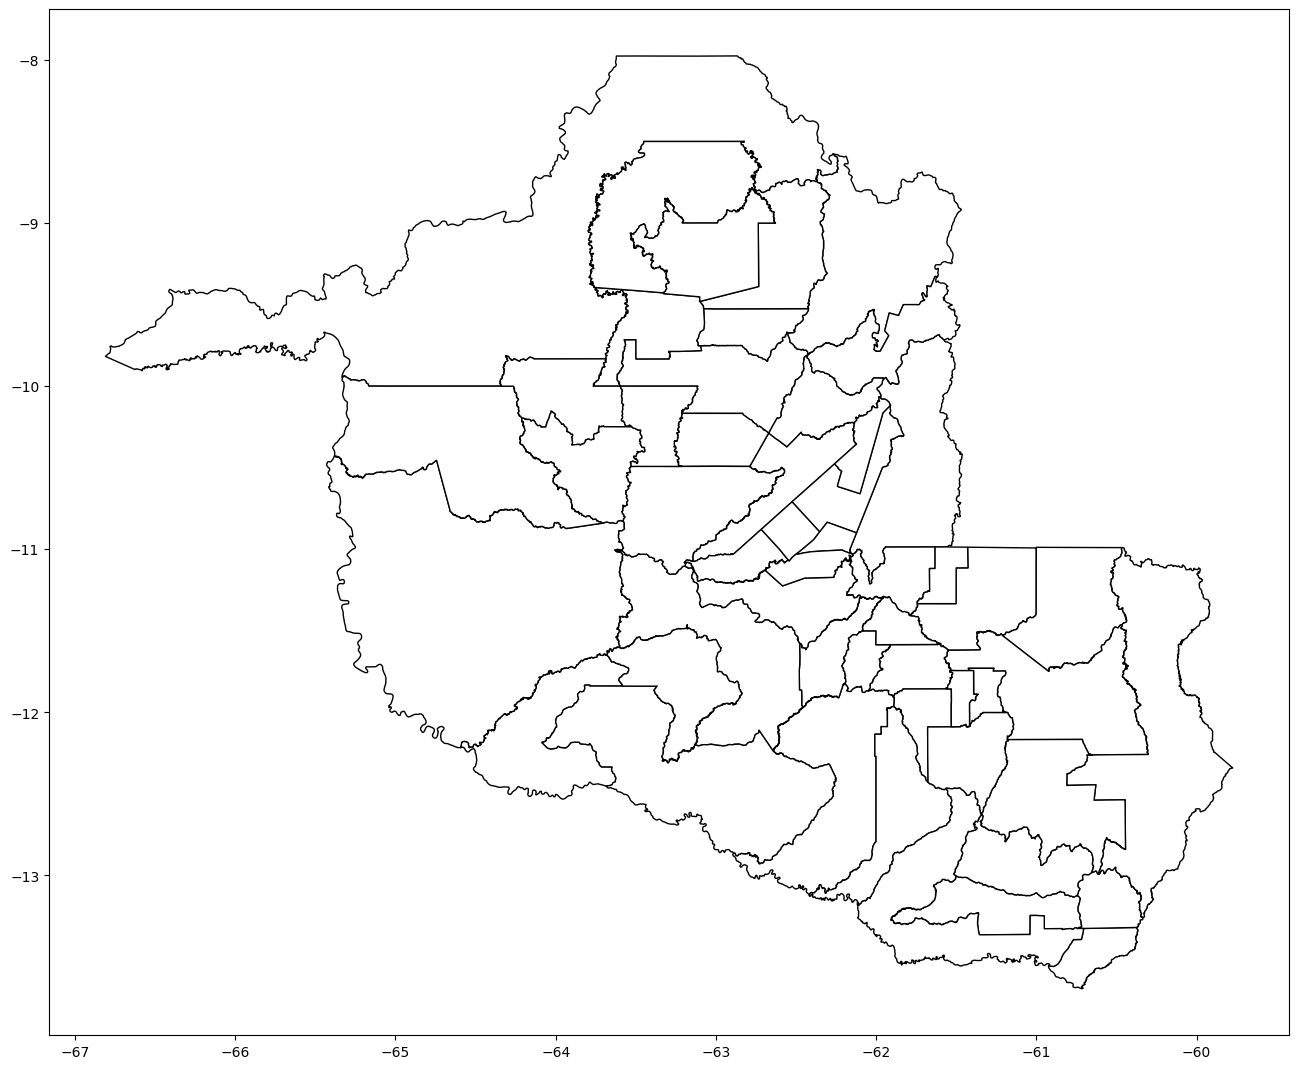

In [4]:
#Plot the map

data.plot(figsize=(16,14), facecolor='white', edgecolor='black')

In [5]:
#filtry the data

gdf_ro = data[data['NM_MUN'] == 'Porto Velho']


<Axes: >

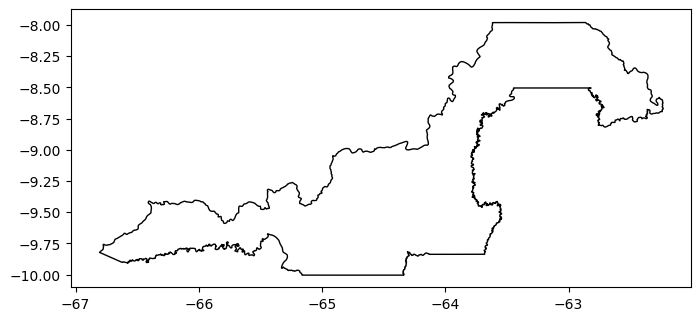

In [6]:
#plot the pvh map

gdf_ro.plot(figsize=(8,8), facecolor='white', edgecolor='black')

In [7]:
#Save the data to facilitate

gdf_ro.to_file('mapa_pvh.json', driver='GeoJSON')

Dados dos Hoteis

In [8]:
# Import the data of the hotels

df_hoteis = pd.read_excel('C:/Users/j0ub3/Documents/GitHub/Mapa_de_Calor-Hoteis-pvh/Tabulação de dados.xlsx')

In [9]:
#verify

df_hoteis.columns

Index(['ID', 'Nome', 'data_pesq', 'data_fund', 'qtd_qrtos', 'qtd_fnarios',
       'tax_ocup_atual', 'tax_ocup_anual', 'cap_total', 'diaria_solt',
       'diaria_casal', 'qtd_dias', 'lat', 'long', 'acad', 'al_mossar',
       'cafe_inclus', 'audit', 'piscina', 'sala_jogos', 'serv_de_qrto',
       'buss_cnter', 'sala_events', 'rede', 'estrut_pcd', 'lavand',
       'period_bom1', 'period_bom2', 'period_bom3', 'period_bom4',
       'period_bom5', 'period_bom6', 'period_bom7', 'period_bom8',
       'period_bom9', 'period_bom10', 'period_bom11', 'period_bom12',
       'period_ruim1', 'period_ruim2', 'period_ruim3', 'period_ruim4',
       'period_ruim5', 'period_ruim6', 'period_ruim7', 'period_ruim8',
       'period_ruim9', 'period_ruim10', 'period_ruim11', 'period_ruim12',
       'atrat_cp', 'atrat_show', 'atrat_evrlg', 'atrat_evpolit',
       'atrat_evspriv', 'atrat_evspubli', 'atrat_carn', 'atrat_joer',
       'atrat_acadm', 'atrat_tour', 'format_qrto1', 'format_qrto2',
       'format_qrto3

In [10]:
#df_hoteis = df_hoteis[['lat', 'long']]

In [10]:
#Filtry the df

df_hoteis = df_hoteis[['lat', 'long', 'diaria_solt', 'diaria_casal']]

In [11]:
#Make the avareage 

media_diaria = (df_hoteis['diaria_solt'] + df_hoteis['diaria_casal'])/2

In [12]:
# put in the df_hoteis

df_hoteis['Media_diaria'] = media_diaria

In [13]:
#Drop the columns that we not has interest

df_hoteis.drop(columns=['diaria_solt', 'diaria_casal'], inplace=True)

In [14]:
#verify

df_hoteis

,lat,long,Media_diaria
0,-8.760044,-63.877952,205.0
1,-8.758139,-63.883837,55.0
2,-8.764234,-63.896625,215.0
3,-8.766005,-63.885453,240.0
4,-8.756883,-63.884945,115.0
5,-8.743823,-63.887531,220.0
6,-8.788073,-63.888131,101.0
7,-8.762501,-63.884599,303.0
8,-8.757041,-63.884945,115.0
9,-8.757392,-63.883584,92.5


Criar o GeoDataFrame (GeoPandas)

In [15]:
# Importar a classe point 
from shapely.geometry import Point

In [16]:
#Criar coluna Geometry  
df_hoteis['geometry'] = None

for index, row in df_hoteis.iterrows():
    df_hoteis.loc[index, 'geometry'] = Point(row.long, row.lat)


In [17]:
#verify the type

type(df_hoteis)

pandas.core.frame.DataFrame

In [18]:
#Criar o GeoDataFrame

gdf_hoteis = gpd.GeoDataFrame(df_hoteis, geometry='geometry')

In [19]:
# verify

type(gdf_hoteis)

geopandas.geodataframe.GeoDataFrame

In [20]:
# verify

gdf_hoteis.head(5)

,lat,long,Media_diaria,geometry
0,-8.760044,-63.877952,205.0,POINT (-63.87795 -8.76004)
1,-8.758139,-63.883837,55.0,POINT (-63.88384 -8.75814)
2,-8.764234,-63.896625,215.0,POINT (-63.89663 -8.76423)
3,-8.766005,-63.885453,240.0,POINT (-63.88545 -8.76600)
4,-8.756883,-63.884945,115.0,POINT (-63.88495 -8.75688)


<Axes: >

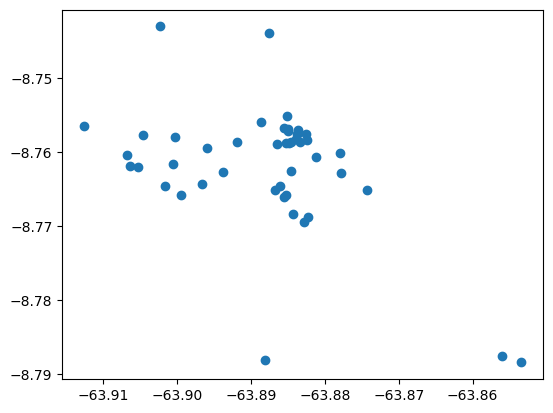

In [21]:
#plot in a simple graph the locations 

gdf_hoteis.plot()

In [28]:
# import

filename = 'C:/users/j0ub3/Documents/GitHub/Mapa_de_Calor-Hoteis-pvh/mapa_pvh.json'

gdf_pvh = gpd.read_file(filename, driver='GeoJSON')

<Axes: >

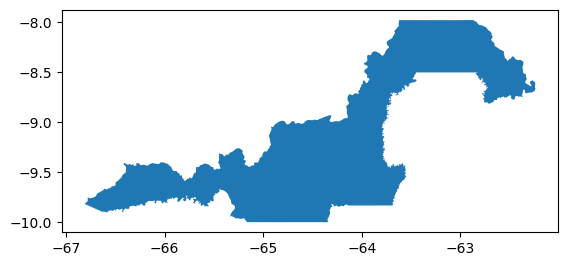

In [29]:
gdf_pvh.plot()

<Axes: >

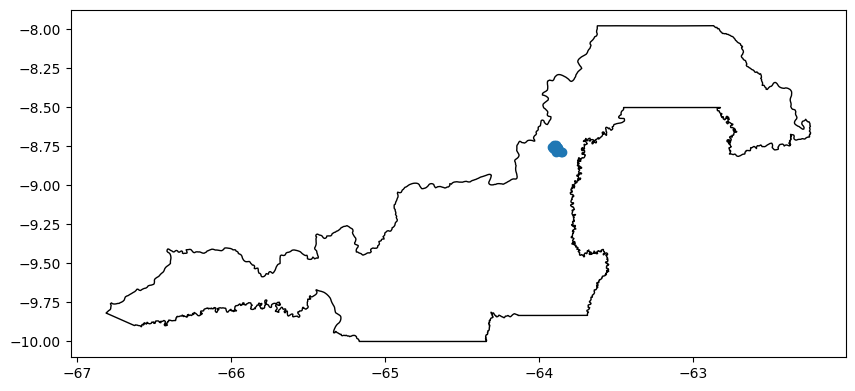

In [30]:
#Mostrar os dados com matplotlib
fig, ax = plt.subplots(figsize=(10,10))

gdf_hoteis.plot(ax=ax)
gdf_pvh.plot(ax=ax, facecolor='none', edgecolor='black')

In [33]:
#Vamos pegar o polygon de porto velho

polygon_pvh = gdf_pvh.iloc[0].geometry


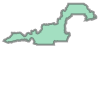

In [34]:
polygon_pvh


In [35]:
#Plot only the data that intersect with pvh territory

gdf_hoteis_pvh = gdf_hoteis[gdf_hoteis.intersects(polygon_pvh)]

<Axes: >

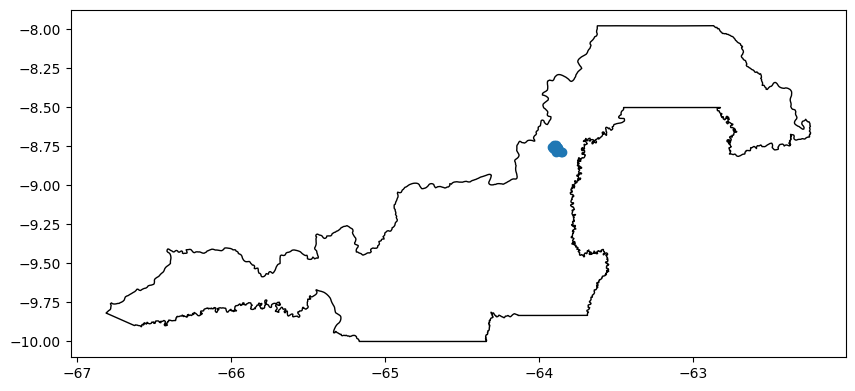

In [36]:
#Plot the data intersected 

fig, ax = plt.subplots(figsize=(10,10))

gdf_hoteis_pvh.plot(ax=ax)
gdf_pvh.plot(ax=ax, facecolor='none', edgecolor='black')

In [30]:
#Salvando dados para simplificar

gdf_hoteis_pvh.to_file('mapa_hoteis_pvh.json', driver='GeoJSON')

Finalizando os dados com Folium


In [31]:
# see the folium map

fmap = folium.Map()
fmap

In [37]:
# 

gdf_hoteis_pvh = gpd.read_file('c:/Users/j0ub3/Documents/GitHub/Mapa_de_Calor-Hoteis-pvh/mapa_hoteis_pvh.json', 
                               driver='GeoJSON')

gdf_geometria_pvh = gpd.read_file('c:/Users/j0ub3/Documents/GitHub/Mapa_de_Calor-Hoteis-pvh/mapa_pvh.json',
                                driver='GeoJSON')

In [38]:
gdf_hoteis_pvh

,lat,long,Media_diaria,geometry
0,-8.760044,-63.877952,205.0,POINT (-63.87795 -8.76004)
1,-8.758139,-63.883837,55.0,POINT (-63.88384 -8.75814)
2,-8.764234,-63.896625,215.0,POINT (-63.89663 -8.76423)
3,-8.766005,-63.885453,240.0,POINT (-63.88545 -8.76600)
4,-8.756883,-63.884945,115.0,POINT (-63.88495 -8.75688)
5,-8.743823,-63.887531,220.0,POINT (-63.88753 -8.74382)
6,-8.788073,-63.888131,101.0,POINT (-63.88813 -8.78807)
7,-8.762501,-63.884599,303.0,POINT (-63.88460 -8.76250)
8,-8.757041,-63.884945,115.0,POINT (-63.88495 -8.75704)
9,-8.757392,-63.883584,92.5,POINT (-63.88358 -8.75739)


In [40]:
# Unify the two data and packages

fmap = folium.Map()

feat_gejson = folium.features.GeoJson(gdf_hoteis_pvh)

fmap.add_child(feat_gejson)

fmap

In [41]:
# Definindo uma média da latitude e longitude para o mapa inicializar mais próximo

media_latitude = gdf_hoteis_pvh['lat'].mean()
media_longitude = gdf_hoteis_pvh['long'].mean()

fmap = folium.Map(location=[media_latitude, media_longitude], tiles='cartodbpositron')


feat_gejson = folium.features.GeoJson(gdf_hoteis_pvh)

fmap.add_child(feat_gejson)

fmap

In [42]:
fmap = folium.Map(location=[media_latitude, media_longitude], tiles='cartodbpositron')

limites = folium.features.GeoJson(gdf_geometria_pvh,
                                  style_function = lambda feature: {
                                      'color':'black',
                                      'weight':2,
                                      'fillOpacity':0.0
                                  })

fmap.add_child(limites)


feat_gejson = folium.features.GeoJson(gdf_hoteis_pvh)

fmap.add_child(feat_gejson)

fmap

Mapa de Calor

In [43]:
fmap = folium.Map(location=[media_latitude, media_longitude], tiles='cartodbpositron')

heat_map = HeatMap(gdf_hoteis_pvh[['lat', 'long', 'Media_diaria']])

fmap.add_child(heat_map)

In [38]:
# Criar um mapa
fmap = folium.Map(location=[media_latitude, media_longitude], tiles='cartodbpositron')

# Criar uma lista de coordenadas com os pesos de 'Media_diaria'
data = gdf_hoteis_pvh[['lat', 'long', 'Media_diaria']].values.tolist()

# Adicionar o mapa de calor com base na coluna 'Media_diaria'
heat_map = HeatMap(data, 
                   min_opacity=0.65,  # Opacidade mínima dos pontos
                   max_zoom=18,      # Nível de zoom máximo
                   radius=12,        # Raio de influência de cada ponto
                   blur=12,          # Desfoque do mapa de calor
                   max_val=float(gdf_hoteis_pvh['Media_diaria'].max()))  # Valor máximo da escala de cores

# Adicionar o mapa de calor ao mapa
fmap.add_child(heat_map)



C:\Users\j0ub3\AppData\Local\Temp\ipykernel_12828\4136633565.py:8: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heat_map = HeatMap(data,


In [50]:
# Import necessary libraries
import folium
from folium.plugins import HeatMap

# Define custom colors for the heatmap
colors = ['#00EAD3', '#FFF5B7', '#FF449F', '#005F99']

# Define custom color limits for the heatmap based on 'Media_diaria' values
color_limits = [128, 201, 275]  # Custom limits for 'Media_diaria' values

# Create a folium map with a specified location and tileset
fmap = folium.Map(location=[media_latitude, media_longitude], tiles='cartodbpositron')

# Create a list of coordinates with the 'lat', 'long', and 'Media_diaria' values
data = gdf_hoteis_pvh[['lat', 'long', 'Media_diaria']].values.tolist()

# Create a heatmap layer based on the 'Media_diaria' values with custom settings
heat_map = HeatMap(data, 
                   min_opacity=0.65,
                   max_zoom=18,
                   radius=16,
                   blur=12,
                   max_val=float(gdf_hoteis_pvh['Media_diaria'].max()),
                   gradient={0.5: colors[0], 0.6: colors[1], 0.74: colors[2], 1.0: colors[3]})

# Add the heatmap layer to the map
fmap.add_child(heat_map)

# Create a legend for the map
legend_html = """
<div style="position: fixed; bottom: 50px; left: 50px; background-color: rgba(255, 255, 255, 0.5);
                z-index:9999; padding: 10px; border-radius: 5px;">
    <p><strong>Legend</strong></p>
    <p>55 - 128: <span style="color: #00EAD3;">Acessíveis</span></p>
    <p>129 - 201: <span style="color: #FFF5B7;">Confortáveis</span></p>
    <p>202 - 274: <span style="color: #FF449F;">Sofisticados</span></p>
    <p>274+: <span style="color: #005F99;">Luxuosos</span></p>
</div>
"""

# Add the legend to the map
fmap.get_root().html.add_child(folium.Element(legend_html))

# Display the map
fmap

C:\Users\j0ub3\AppData\Local\Temp\ipykernel_12828\3730800955.py:18: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heat_map = HeatMap(data,
